In [6]:
# LIBRARY:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
#import researchpy as rp
import seaborn as sns
import numpy as np

import statsmodels as sa

%matplotlib inline
%matplotlib nbagg

%cd /Users/snkravitz/Documents/Projects_and_Data/GTEx_HaplotypeExpression/bb_test_results/qvalues/GTEX-ALL_SAMPLES/

/Users/snkravitz/Documents/Projects_and_Data/GTEx_HaplotypeExpression/bb_test_results/qvalues/GTEX-ALL_SAMPLES


In [7]:
# Import dataset:

df = pd.read_csv('GTEX-ALL_SAMPLES.v8.phASER.gw_phased.results.fdr_ALL.gene_info.zscores.txt.gz', sep='\t', compression='gzip')

# add column for GENE_IDs without version #:
df[['GENE_ID','ens_version']] = df['GENE_ID'].str.split('.',expand=True)

df.head()

/Users/snkravitz/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CHR,GENE_ID,GENE_NAME,gene_start,gene_stop,SUBJECT_ID,tissue_num,data_pvalues,data_qvalues,data_lfdr,mean_read_counts,total_sample_count_females,total_sample_count_males,total_sample_count,count_fdr_0p1,daee_pctile_fdr_0p1,z_score,RME_effect,ens_version
0,1,ENSG00000228794,LINC01128,825137,859446,GTEX-SE5C,14.0,0.233974,0.655684,1.0,58.0,133.0,NaN,414,74.0,0.178744,0.315991,private_RME,8
1,1,ENSG00000223764,RP11-54O7.3,916869,919692,GTEX-SE5C,10.0,1.000000,1.000000,1.0,38.0,173.0,NaN,492,132.0,0.268293,0.915775,private_RME,2
2,1,ENSG00000188976,NOC2L,944581,959309,GTEX-SE5C,17.0,1.000000,1.000000,1.0,178.0,179.0,NaN,532,48.0,0.090226,-0.276891,private_RME,10
3,1,ENSG00000187961,KLHL17,960586,965715,GTEX-SE5C,15.0,0.473719,1.000000,1.0,24.0,160.0,NaN,473,34.0,0.071882,-0.399756,private_RME,13
4,1,ENSG00000187583,PLEKHN1,966496,975108,GTEX-SE5C,7.0,0.525752,1.000000,1.0,96.0,194.0,NaN,566,47.0,0.083039,-0.325026,private_RME,10


In [8]:
## Filter out X-Chr genes, Imprinted genes, and HLA genes:

# Remove X-Chr:
df = df[df['CHR'] != 'X']

# Remove HLA genes:
df = df[~df['GENE_NAME'].str.contains("HLA")]

# Remove Imprinted Genes:
imprinted_df = pd.read_csv("~/Documents/Gene_Lists/GTEx_Imprinting/GTEx_Imprinted_Table_S3andS4.uniq.txt", sep=' ', names=['GENE_ID', 'chrom', 'start'])
imprinted_genes = list(imprinted_df['GENE_ID'])
#imprinted_genes
df = df[~df['GENE_ID'].isin(imprinted_genes)]

<IPython.core.display.Javascript object>


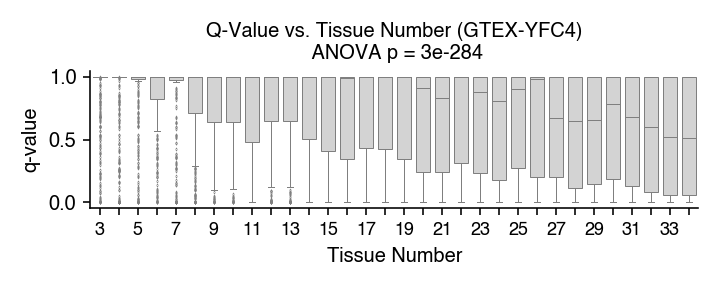

In [13]:
f, ax = plt.subplots(figsize=(5,2), tight_layout=True)
#plt.suptitle("Q-Value vs. Tissue Number")
#sns.color_palette("colorblind")
sns.despine()

#df_plot = df[df['SUBJECT_ID'] == 'GTEX-YFC4']

tissue_nums = sorted(df['tissue_num'].dropna().astype(int).unique())

# Get ANOVA one-way p-value
tissue_dfs = []
for t in tissue_nums:
    tissue_dfs.append(df['data_qvalues'][df['tissue_num'] == t].to_list())
    
anova_p = stats.f_oneway(*[list(df[df['tissue_num']==t].data_qvalues.dropna()) for t in tissue_nums])
#print(anova_p.pvalue)

ax = sns.boxplot(data = df_plot, x = 'tissue_num', y = 'data_qvalues', linewidth=0.5, fliersize=0.1, width=0.7, color="lightgray")
ax.set_xlabel('Tissue Number', fontsize=10)
ax.set_ylabel('q-value', fontsize=10)
tissue_labels = ['3', '', '5', '', '7', '', '9', '', '11', '', '13', '', '15', '', '17', '', '19', '', '21', '', '23', '', '25', '', '27', '', '29', '', '31', '', '33', '', '35', '', '37', '', '39']
ax.set_xticklabels(tissue_labels, size=9)
ax.set_title('Q-Value vs. Tissue Number\n ANOVA p = %.2g' % anova_p.pvalue, fontsize=10)


#plt.show()

#f.savefig('../QC_SupplementalFigures/GTEX-ALL_SAMPLES.v8.phASER_WASP.tissue_num.vs.qval.png', dpi=400)


In [ ]:
#stats.f_oneway(*[list(df[df['tissue_num']==t].data_qvalues.dropna()) for t in tissue_nums])

In [ ]:
#len(list(df[df['tissue_num']==3].data_qvalues))

In [4]:
df.head()

,CHR,GENE_ID,GENE_NAME,gene_start,gene_stop,SUBJECT_ID,tissue_num,data_pvalues,data_qvalues,data_lfdr,mean_read_counts,total_sample_count_females,total_sample_count_males,total_sample_count,count_fdr_0p1,daee_pctile_fdr_0p1,z_score,RME_effect,ens_version
0,1,ENSG00000228794,LINC01128,825137,859446,GTEX-SE5C,14.0,0.233974,0.655684,1.0,58.0,133.0,NaN,414,74.0,0.178744,0.315991,private_RME,8
1,1,ENSG00000223764,RP11-54O7.3,916869,919692,GTEX-SE5C,10.0,1.000000,1.000000,1.0,38.0,173.0,NaN,492,132.0,0.268293,0.915775,private_RME,2
2,1,ENSG00000188976,NOC2L,944581,959309,GTEX-SE5C,17.0,1.000000,1.000000,1.0,178.0,179.0,NaN,532,48.0,0.090226,-0.276891,private_RME,10
3,1,ENSG00000187961,KLHL17,960586,965715,GTEX-SE5C,15.0,0.473719,1.000000,1.0,24.0,160.0,NaN,473,34.0,0.071882,-0.399756,private_RME,13
4,1,ENSG00000187583,PLEKHN1,966496,975108,GTEX-SE5C,7.0,0.525752,1.000000,1.0,96.0,194.0,NaN,566,47.0,0.083039,-0.325026,private_RME,10


<IPython.core.display.Javascript object>


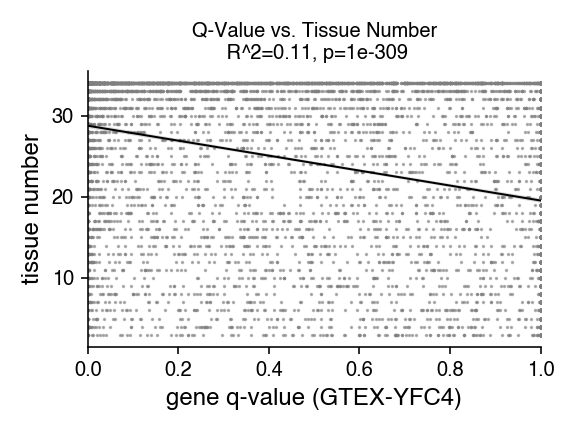

Text(0.5, 1.0, 'Q-Value vs. Tissue Number\n R^2=0.11, p=1e-309')

In [5]:
## Regplot of q-val vs. tissue num for GTEX-YFC4

f, ax = plt.subplots(figsize=(4,3), tight_layout=True)
sns.despine()

df_plot = df[df['SUBJECT_ID'] == 'GTEX-YFC4']

slope, intercept, r_value, p_value, std_err = stats.linregress(df_plot['data_qvalues'],df_plot['tissue_num'].astype(int))
r_squared = r_value ** 2

ax = sns.regplot(data=df_plot, x=df_plot['data_qvalues'], y=df_plot['tissue_num'].astype(int), fit_reg=True, truncate=True, ci=95, scatter_kws={"color":"grey", "s": 0.5, "alpha": 0.6, 'rasterized': True}, line_kws={"color":"black", "lw":1})
ax.set_xlabel('gene q-value (GTEX-YFC4)', fontsize=12, fontweight='light')
ax.set_ylabel('tissue number', fontsize=12, fontweight='light')
#ax.set_ylim(0, 8)
#ax.set_xlim(0, 20)
ax.set_title('Q-Value vs. Tissue Number\n R^2={0:.2g}, p={1:.2g}'.format(r_squared,p_value), fontsize=10)

#plt.show()


#f.savefig('/Users/snkravitz/Desktop/q-val_figs/GTEX-YFC4.all-tissues.gene_length.vs.q-val.regplot.pdf', dpi=400, transparent=True)
